In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Face Extraction

In [2]:
def setRange0to255(im):
    return (im-np.min(im))*(255/(np.max(im-np.min(im))))

In [3]:
def bgr2rgb(img):
    return img[...,::-1]

In [4]:
path_to_img = '../../data/inputs/Angela_Lansbury_0002.jpg'

Number of faces :1


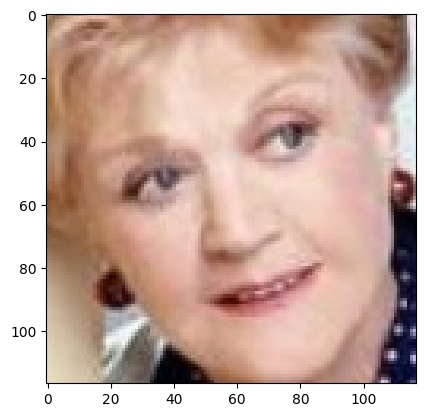

In [5]:
# face extraction from portrait image
def extract_face(img):
    face_cascade = cv2.CascadeClassifier('../../data/inputs/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 1)#,minSize=(100,100),maxSize=(250, 250))
    print("Number of faces :{0}".format(len(faces)))
    img = np.ascontiguousarray(img, dtype=np.uint8)
    for (x,y,w,h) in faces:
        roi_color = img[y:y+h, x:x+w]
    return roi_color,x,y,w,h

img = bgr2rgb(cv2.imread(path_to_img))
face_img,x,y,w,h = extract_face(img)
# print(img[y:y+h, x:x+w].shape,face_img.shape)
plt.imshow(face_img)

## Extract Edges

(117, 117)


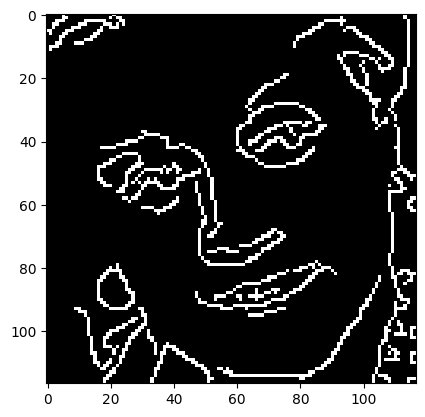

In [6]:
#cannny edge extractor
def canny_edge_extractor(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

img=face_img#bgr2rgb(cv2.imread("../images/raw/Abdullah_Ahmad_Badawi_0001.jpg"))
edge_img=canny_edge_extractor(img)
print(edge_img.shape)
plt.imshow(edge_img,cmap='gray')

## Quantize

(117, 117, 3)


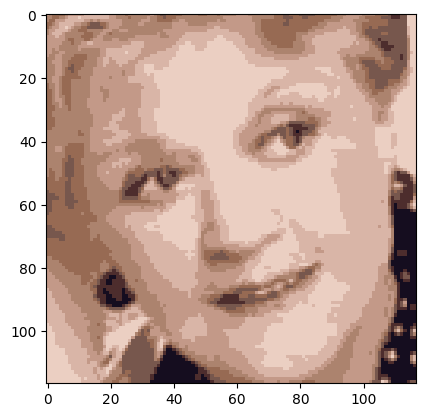

In [7]:
# lab space k-means clustering of an image
def lab_space_kmeans(img):
    img=cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    orig_img = img.reshape((-1,3)).astype(np.float32)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 8
    _,label,center=cv2.kmeans(orig_img,K,None,criteria,16,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    kmeaned_img = center[label.flatten()]
    fin_img = kmeaned_img.reshape((img.shape))
    fin_img=cv2.cvtColor(fin_img,cv2.COLOR_LAB2RGB)
    return fin_img
img=face_img#bgr2rgb(cv2.imread("../images/raw/Abdullah_Ahmad_Badawi_0001.jpg"))
kmean_img=lab_space_kmeans(img)
print(kmean_img.shape)
plt.imshow(kmean_img)

## Blending

(117, 117, 3)


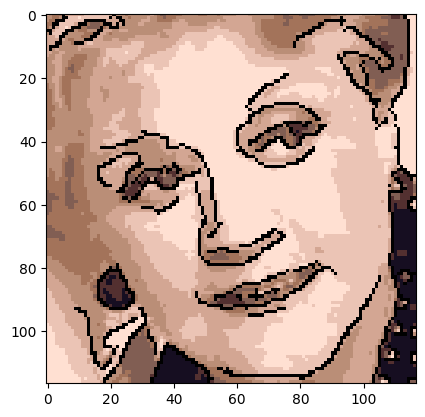

In [8]:
def blend_img(edge,quant):
    #multiply each channel of image by 2d edge image
    edge=(255-edge)/255
    edge=edge[...,np.newaxis]
    edge=np.concatenate((edge,edge,edge),axis=2)
    #normalize quantized image
    quant=quant/np.max(quant)
    blended_img=edge*quant
    return setRange0to255(blended_img).astype(np.uint8)
fin_img = blend_img(edge_img,kmean_img)
# print(np.unique(fin_img))
print(fin_img.shape)
plt.imshow(fin_img)

## Final

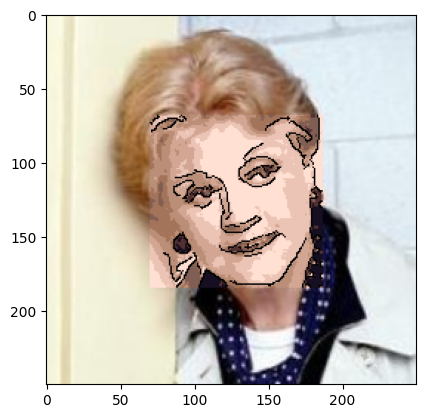

In [9]:
# for x,y,w,h in faces:
# print(img[y:y+h, x:x+w].shape,face_img.shape,x,y,w,h)
img = bgr2rgb(cv2.imread(path_to_img))
img[y:y+h, x:x+w] = fin_img
plt.imshow(img)